In [1]:
import pandas as pd
import quandl

df = quandl.get('WIKI/GOOGL')

In [2]:
df.head(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
2004-08-26,104.95,107.95,104.66,107.910,7094800.0,0.0,1.0,52.637487,54.142132,52.492038,54.122070,7094800.0
2004-08-27,108.10,108.62,105.69,106.150,6211700.0,0.0,1.0,54.217364,54.478169,53.008633,53.239345,6211700.0
2004-08-30,105.28,105.49,102.01,102.010,5196700.0,0.0,1.0,52.802998,52.908323,51.162935,51.162935,5196700.0
2004-08-31,102.32,103.71,102.16,102.370,4917800.0,0.0,1.0,51.318415,52.015567,51.238167,51.343492,4917800.0


In [3]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0


df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

df.head()


,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [4]:
import math

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace = True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


In [5]:
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression

END in the middle of part 4


In [6]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]


df.dropna(inplace=True)

y = np.array(df['label'])

C:\Users\konrad-lisewski\AppData\Local\Temp\ipykernel_22884\2492407160.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'],1))


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

clf = LinearRegression(n_jobs=10)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)

In [8]:
forecast_set = clf.predict(X_lately)

In [9]:
print(forecast_set, accuracy, forecast_out)

[1103.1324701  1074.1485071  1020.78275411 1062.25904551 1074.64372821
 1074.86033202 1093.3938143  1112.83977327 1115.94363371 1123.86849193
 1133.08001322 1130.8716666  1150.35060753 1166.00045537 1137.65234783
 1123.80955032 1089.51599045 1104.45030508 1115.5350248  1122.8575807
 1136.44090593 1151.2990138  1182.77350203 1187.32551975 1159.16918181
 1170.17873123 1172.02000453 1154.91617496 1120.24149233 1116.60280974
 1114.20699518 1071.49303365 1043.47457945 1074.52473246 1022.40636459] 0.9776828849069167 35


In [10]:
import math, datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

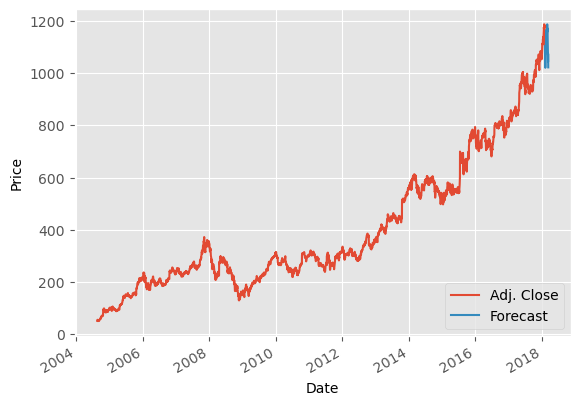

In [11]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] +[i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# pickle clasifier

In [12]:
import pickle

In [13]:
clf = LinearRegression(n_jobs=10)
clf.fit(X_train,y_train)
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)
    
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)